 # 의사 결정나무
 - 어떤 규칙을 하나의 트리형태로 표현한 후 이를 바탕으로 분류나 회귀문제를 해결하는 알고리즘
 - 딥러닝 기반을 제외한 전통적인 통계 기반의 머신러닝 모델중 직관적이고 가장 실용성이 높은 모델중 하나
 - scikit-learn의 tree 서브모듈에 DecisionTreeclassifier

## 로지스틱 회귀로 와인 분류하기

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import mglearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.datasets import load_breast_cancer, load_boston, load_diabetes
import warnings
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrix

warnings.simplefilter(action='ignore', category=FutureWarning)
# FutureWarning제거

%matplotlib inline

# mpl.rcParams['font.family'] = 'D2coding'  # 한글 깨짐 해결
plt.rc('font', family='D2coding')

In [2]:
wine = pd.read_csv('https://raw.githubusercontent.com/rickiepark/hg-mldl/master/wine.csv')

In [3]:
wine.shape

(6497, 4)

In [4]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [6]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [7]:
wine['class'].unique()

array([0., 1.])

In [8]:
wine['class'].value_counts()

1.0    4898
0.0    1599
Name: class, dtype: int64

In [9]:
wine_input = wine[['alcohol', 'sugar', 'pH']].to_numpy()
wine_target = wine['class'].to_numpy()

In [10]:
wine_input.shape, wine_target.shape

((6497, 3), (6497,))

## 훈련 세트와 테스트 세트로 분리

In [11]:
train_input, test_input, train_target, test_target = train_test_split(
    wine_input, wine_target, test_size=0.2, random_state=42
)

## 피쳐스케일링

In [16]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## 회귀 모델 구축

In [17]:
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7804502597652492
0.7776923076923077


In [19]:
print(lr.coef_, lr.intercept_)

[[ 0.51474158  1.68381319 -0.6888729 ]] [1.82368541]


## 의사결정나무

In [21]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


In [ ]:
plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth=2, filled=True, feature_names= ['alcohol', 'sugar', 'pH'])
plt.show()

## proning(가지치기)
- 과적합 막기위해 사용

In [28]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


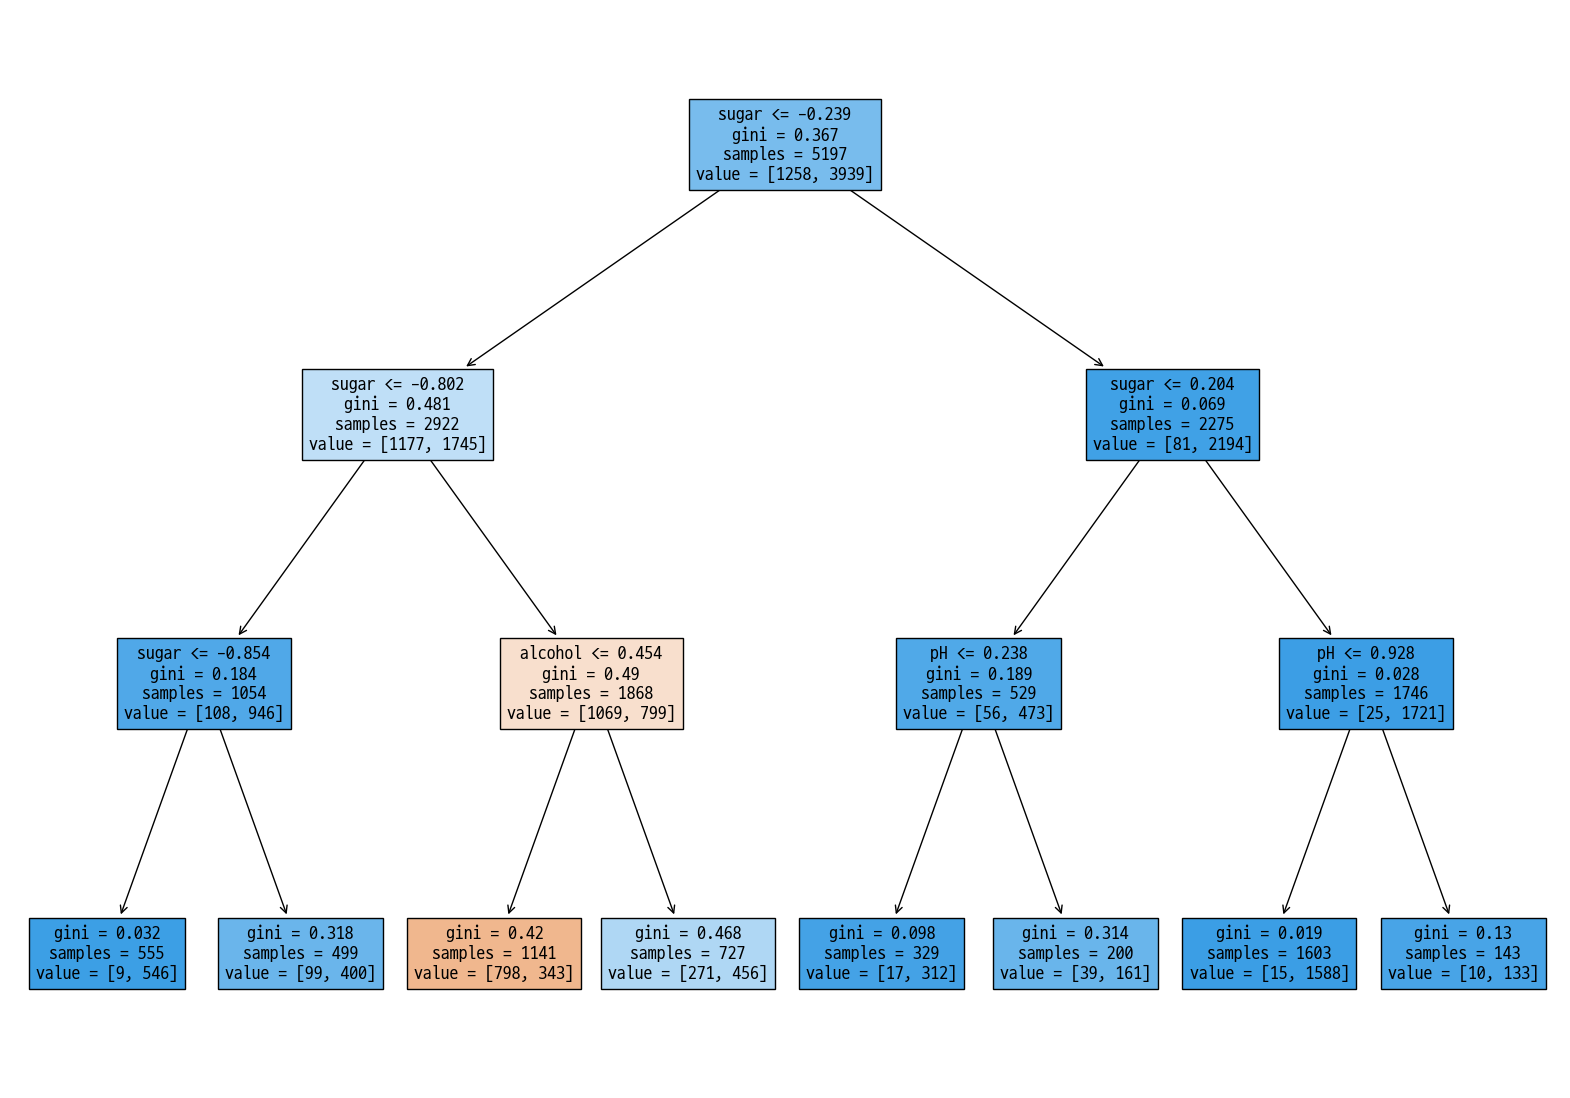

In [31]:
plt.figure(figsize=(20, 14))
plot_tree(dt, filled=True, feature_names= ['alcohol', 'sugar', 'pH'])
plt.show()

In [32]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


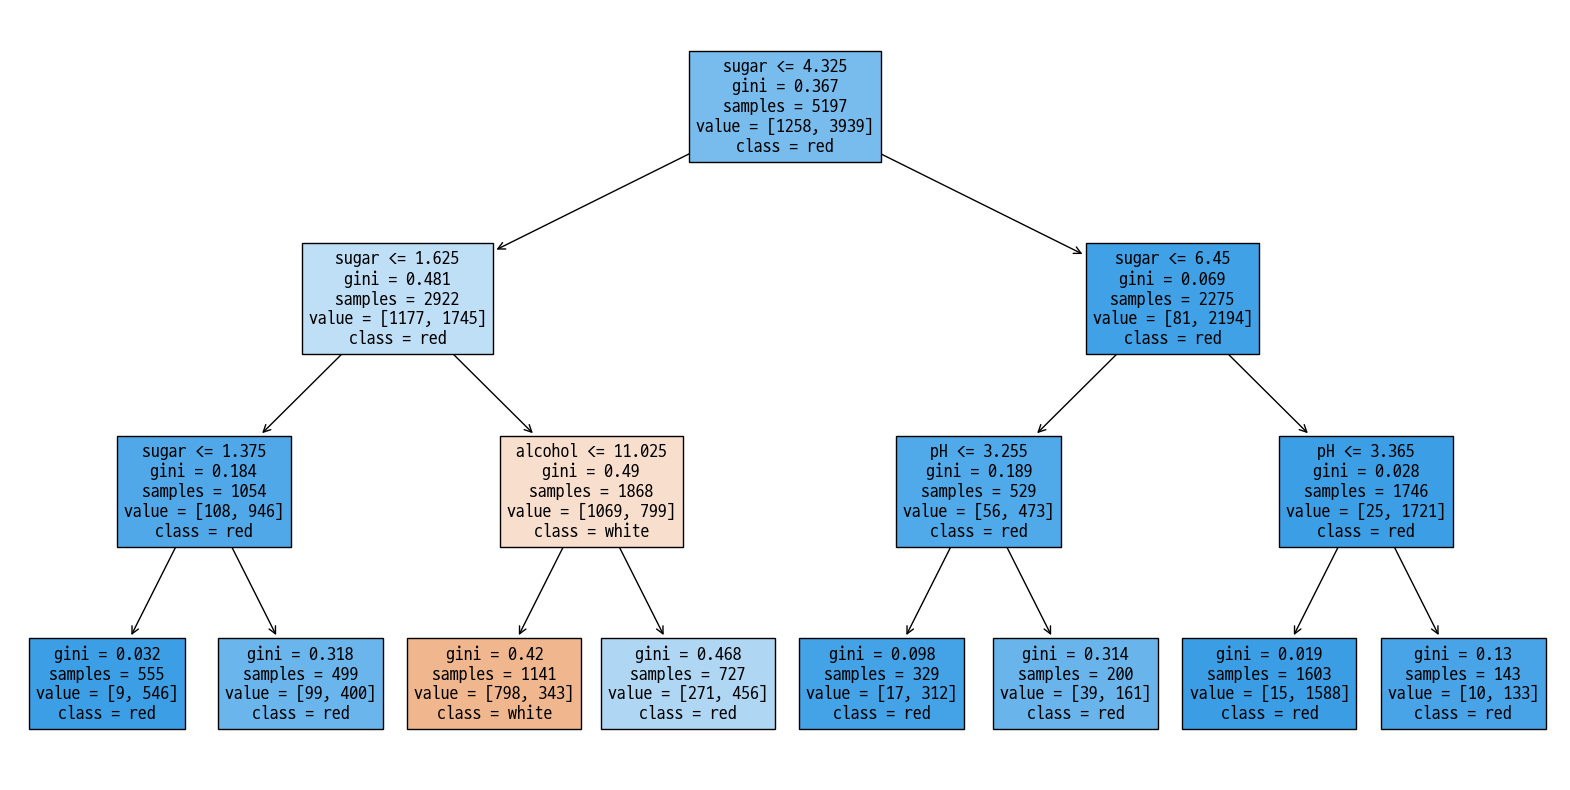

In [44]:
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'], class_names=['white', 'red'])
plt.show()

In [37]:
# 특성 중요도 : 결정트리는 어떤 특성이 가장 유용한지를 나타내는 특성 중요도를 계산해 준다.
dt.feature_importances_

array([0.12345626, 0.86862934, 0.0079144 ])